In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("/kaggle/input/firedataset/fire_archive.csv")

In [3]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          48      6.3       297.3   6.6        D     0  
1     Terra      MODIS          71      6.3       297.3  11.3        D     0  
2     Terra      MODIS          42      6.3       298.7  23.1        D     0  
3     Terra      MODIS          33      6.3       296.1   6.5        D     0  
4     Terra      MODIS          36      6.3       298.8  27.6        D     0

In [4]:
df.shape

(36011, 15)

In [5]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


In [7]:
df.describe()

latitude     longitude    brightness          scan         track  \
count  36011.000000  36011.000000  36011.000000  36011.000000  36011.000000   
mean     -19.100962    138.931446    328.750696      1.620905      1.215281   
std        7.265777      9.261400     18.992808      0.813764      0.247852   
min      -42.762800    114.104300    300.000000      1.000000      1.000000   
25%      -26.370250    131.072250    316.500000      1.100000      1.000000   
50%      -15.706500    136.738500    326.400000      1.300000      1.100000   
75%      -13.343600    147.477500    336.700000      1.900000      1.300000   
max      -10.072600    153.490400    504.400000      4.800000      2.000000   

           acq_time    confidence       version    bright_t31           frp  \
count  36011.000000  36011.000000  3.601100e+04  36011.000000  36011.000000   
mean     600.025798     67.551387  6.300000e+00    301.339138     51.132176   
std      548.369111     23.179946  3.728625e-12      9.724462     92.280112   
min        0.000000      0.000000  6.300000e+00    267.000000      0.000000   
25%      205.000000     52.000000  6.300000e+00    293.600000     13.800000   
50%      424.000000     70.000000  6.300000e+00    302.400000     25.800000   
75%      600.000000     86.000000  6.300000e+00    308.600000     52.800000   
max     2359.000000    100.000000  6.300000e+00    400.100000   3679.500000   

               type  
count  36011.000000  
mean       0.019439  
std        0.198326  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.000000

In [8]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          48      6.3       297.3   6.6        D     0  
1     Terra      MODIS          71      6.3       297.3  11.3        D     0  
2     Terra      MODIS          42      6.3       298.7  23.1        D     0  
3     Terra      MODIS          33      6.3       296.1   6.5        D     0  
4     Terra      MODIS          36      6.3       298.8  27.6        D     0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


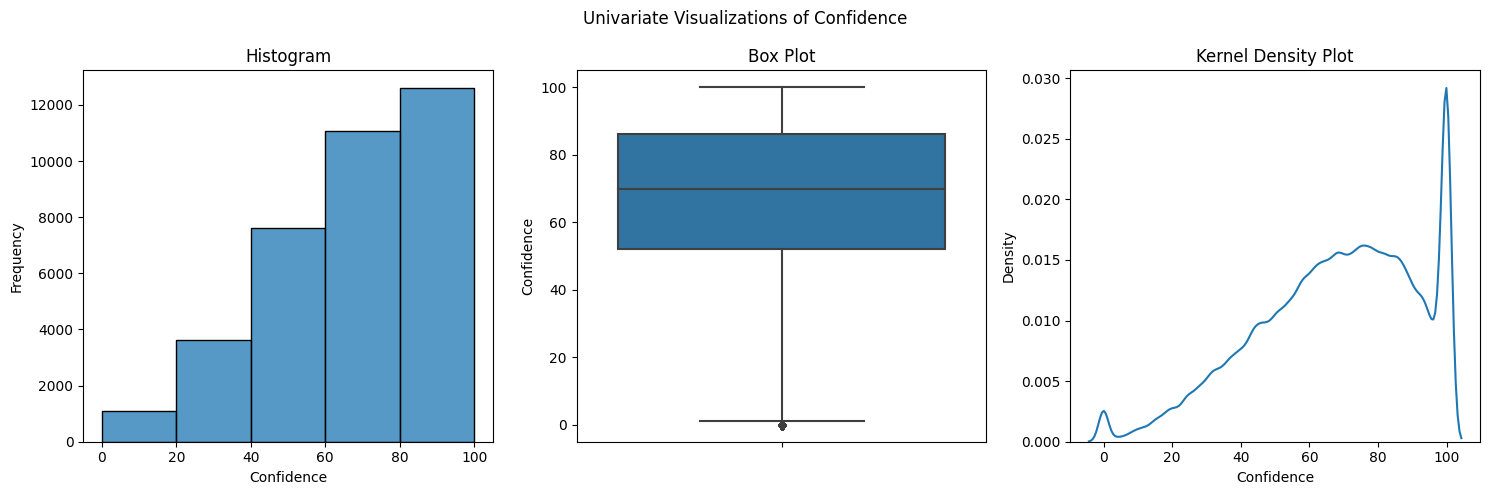

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Univariate Visualizations of Confidence')

# Histogram
sns.histplot(df['confidence'], bins=5, kde=False, ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Confidence')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(y=df['confidence'], ax=axes[1])
axes[1].set_title('Box Plot')
axes[1].set_ylabel('Confidence')

# Kernel Density Plot
sns.kdeplot(df['confidence'], bw_adjust=0.5, ax=axes[2])
axes[2].set_title('Kernel Density Plot')
axes[2].set_xlabel('Confidence')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

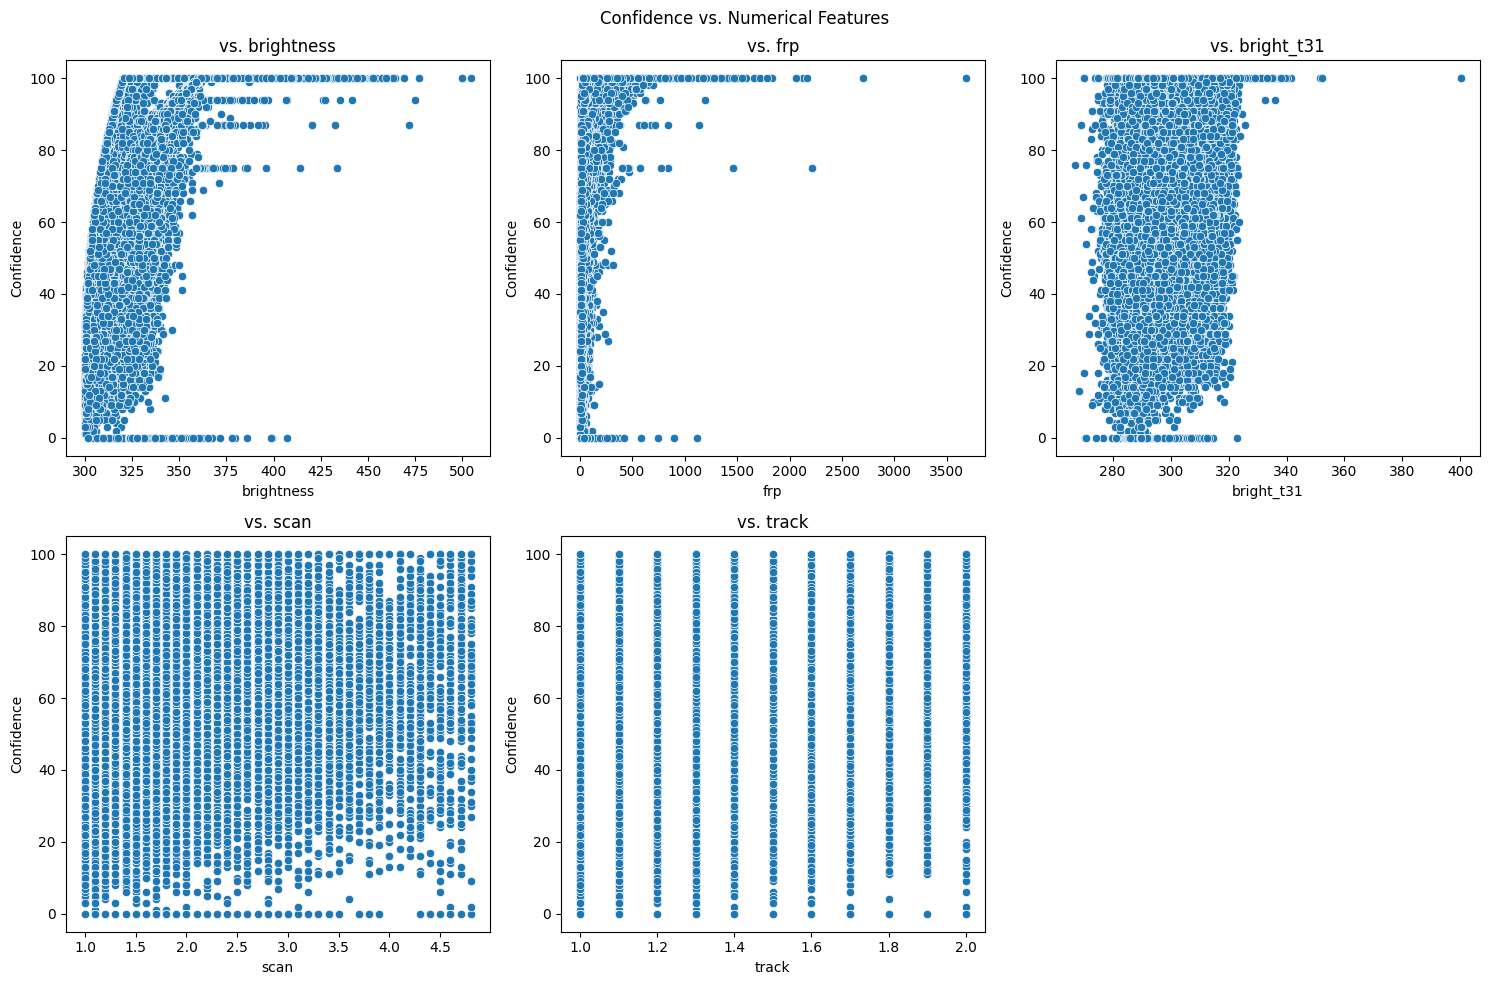

In [10]:
numerical_features = ['brightness', 'frp', 'bright_t31', 'scan', 'track']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confidence vs. Numerical Features')
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=df[feature], y=df['confidence'], ax=axes[i])
    axes[i].set_title(f'vs. {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Confidence')

# Remove empty subplot (if any)
if len(numerical_features) < len(axes):
    for j in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

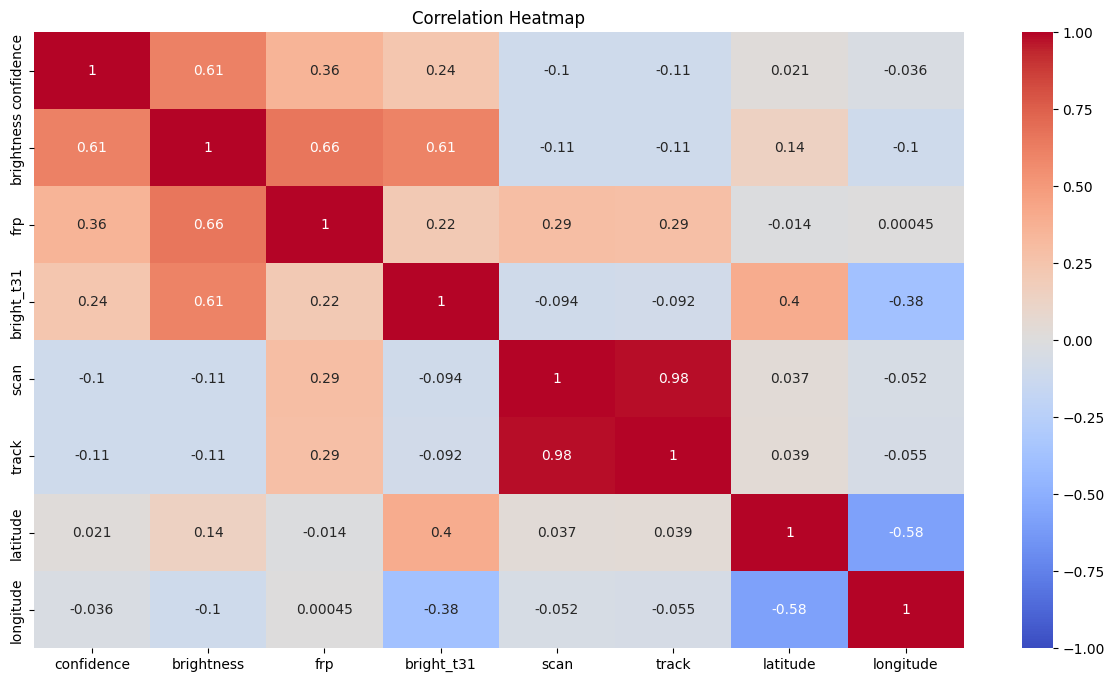

In [11]:
plt.figure(figsize=(15, 8))
corr = df[['confidence', 'brightness', 'frp', 'bright_t31', 'scan', 'track', 'latitude', 'longitude']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

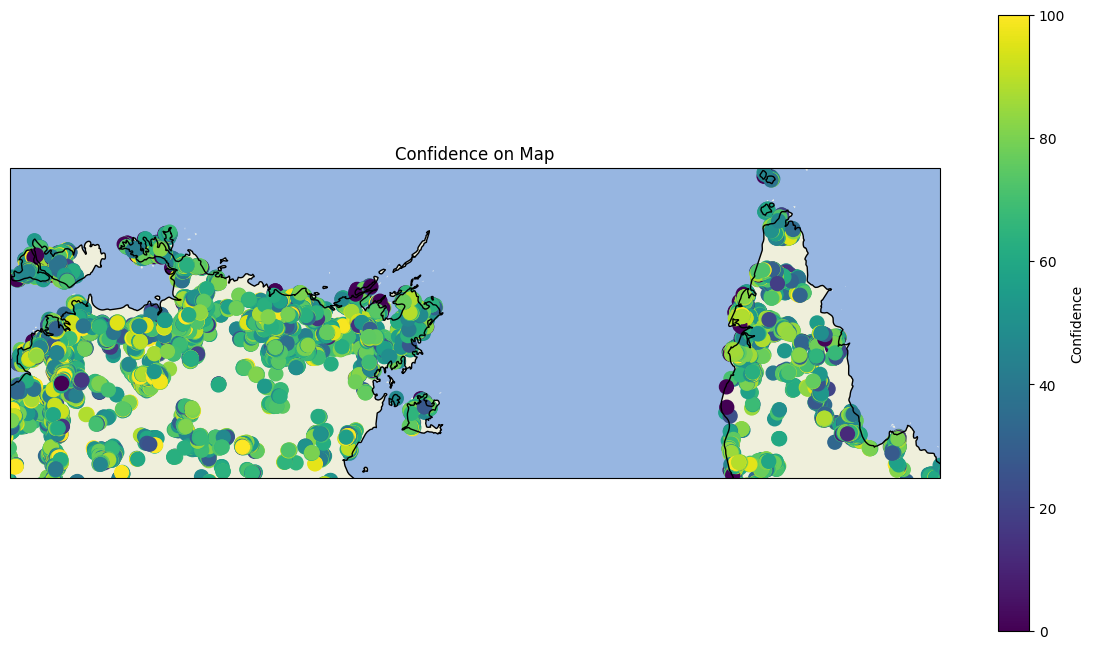

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
scatter = ax.scatter(df['longitude'], df['latitude'], c=df['confidence'], s=100, cmap='viridis', transform=ccrs.PlateCarree())
plt.colorbar(scatter, label='Confidence')
ax.set_title('Confidence on Map')
ax.set_extent([130, 145, -15, -10], crs=ccrs.PlateCarree())  # Zoom to the region
plt.show()

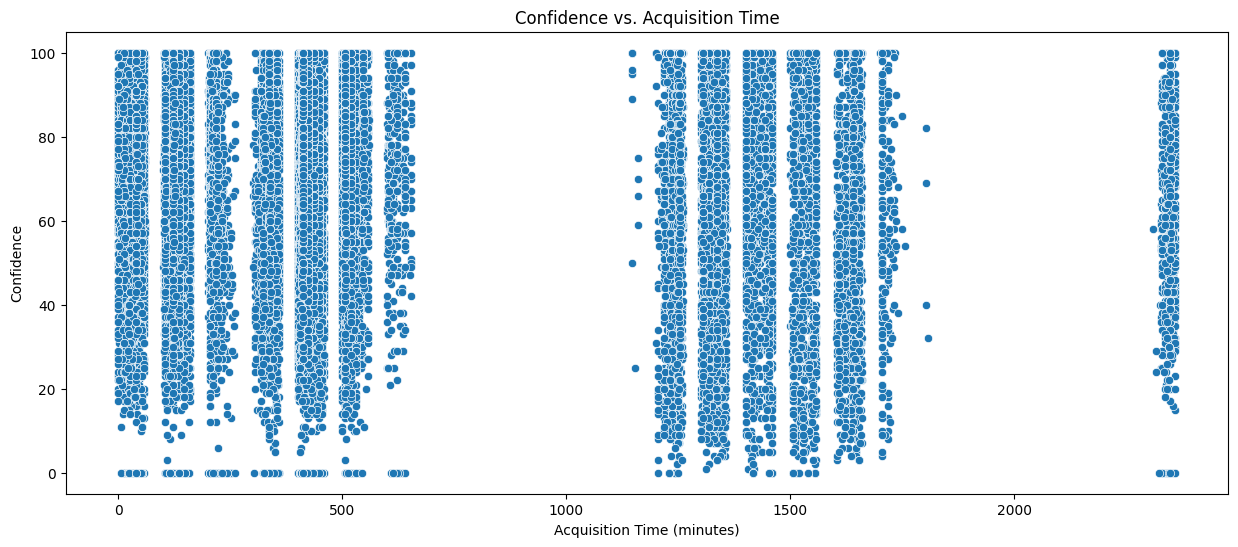

In [13]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df['acq_time'], y=df['confidence'])
plt.title('Confidence vs. Acquisition Time')
plt.xlabel('Acquisition Time (minutes)')
plt.ylabel('Confidence')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

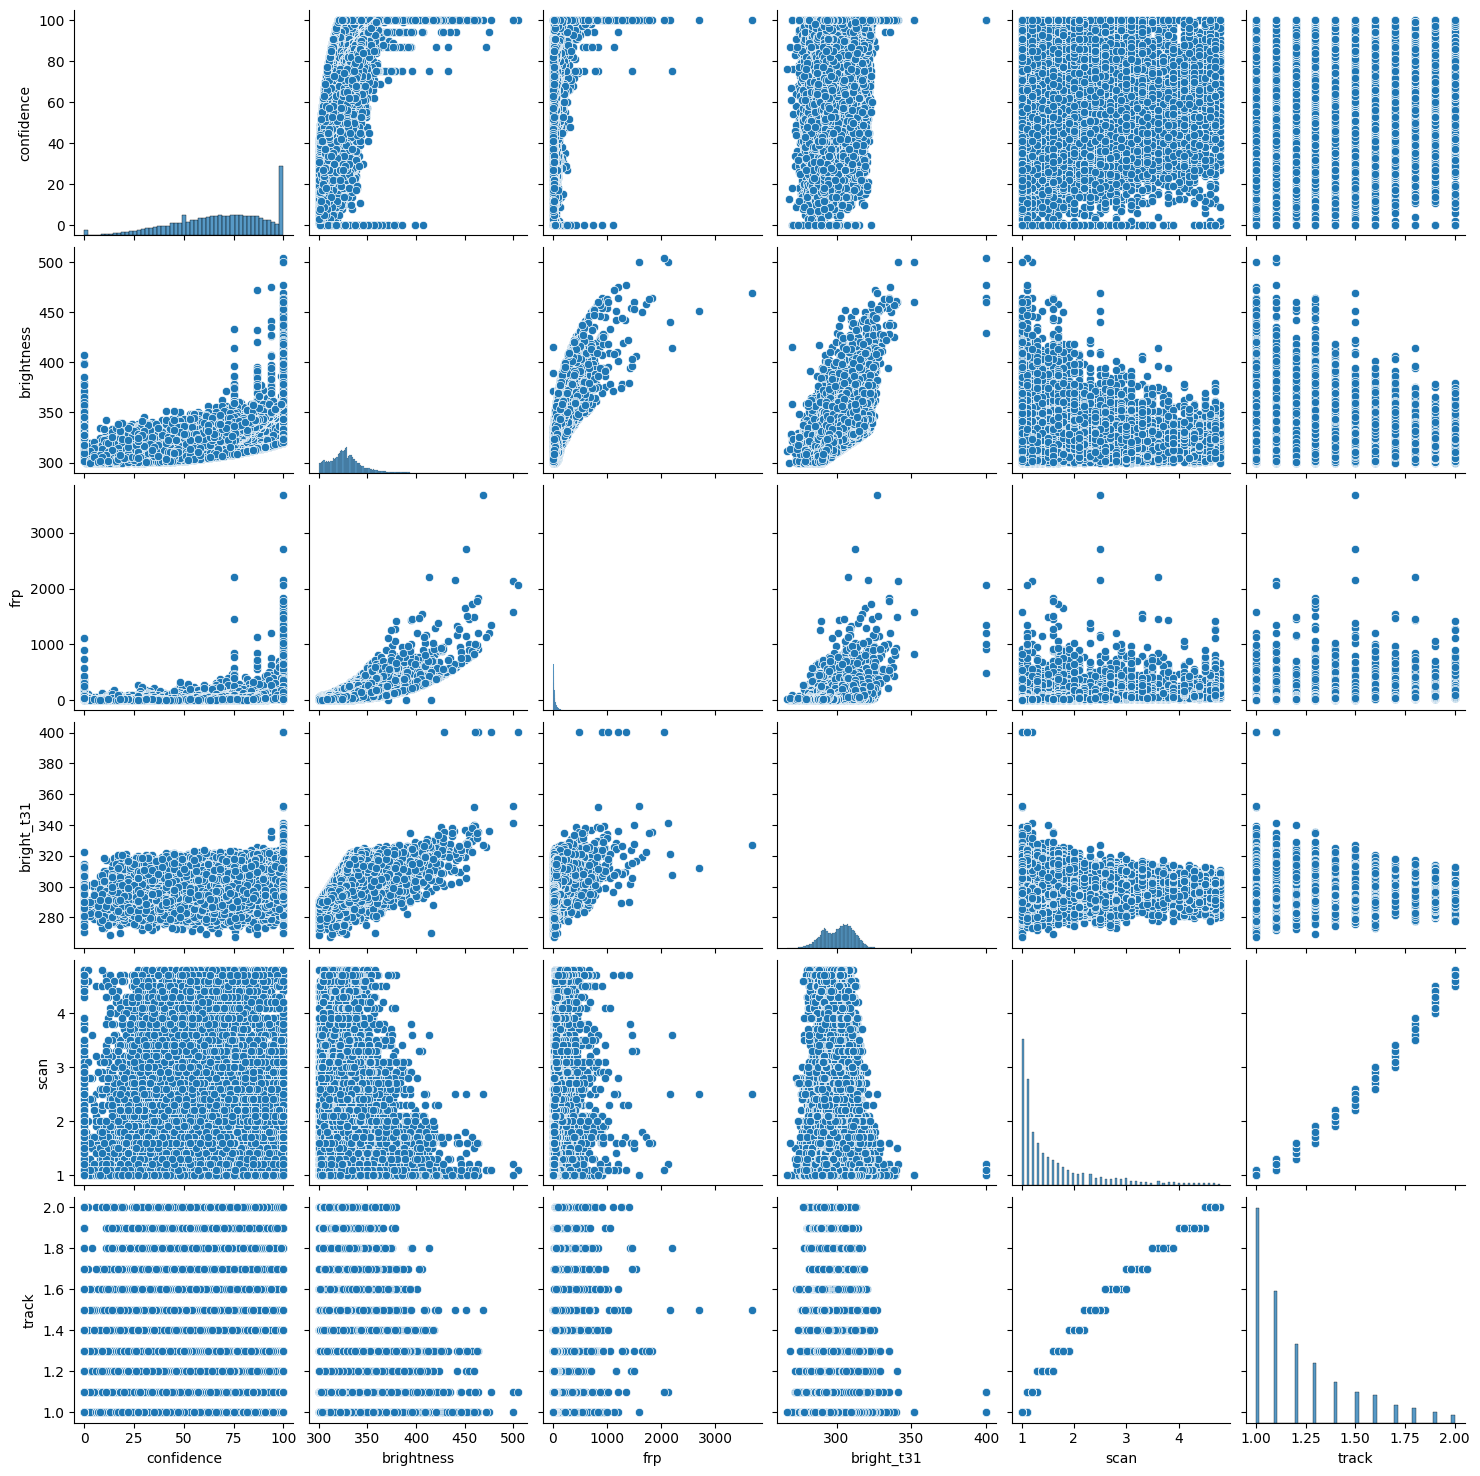

In [14]:
sns.pairplot(df[['confidence', 'brightness', 'frp', 'bright_t31', 'scan', 'track']])
plt.show()

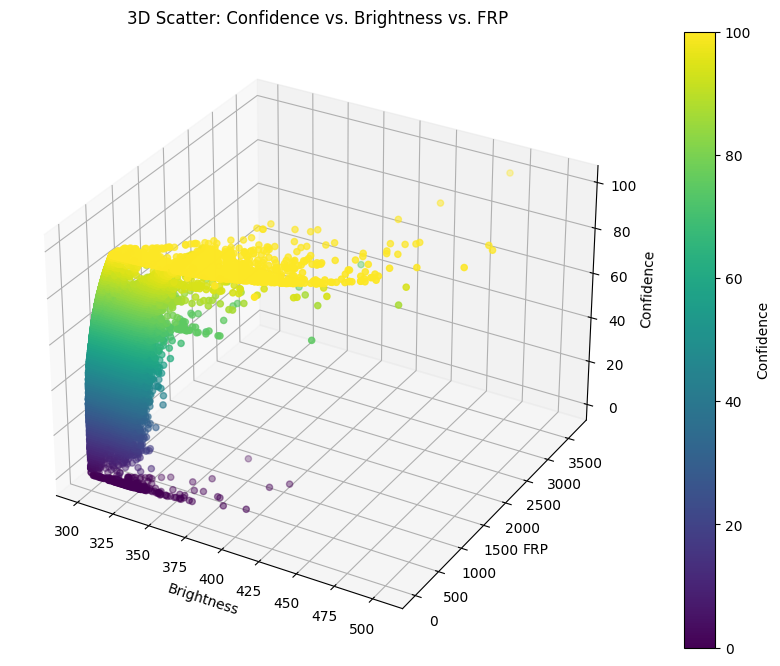

In [15]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['brightness'], df['frp'], df['confidence'], c=df['confidence'], cmap='viridis')
ax.set_xlabel('Brightness')
ax.set_ylabel('FRP')
ax.set_zlabel('Confidence')
plt.title('3D Scatter: Confidence vs. Brightness vs. FRP')
fig.colorbar(scatter, label='Confidence')
plt.show()

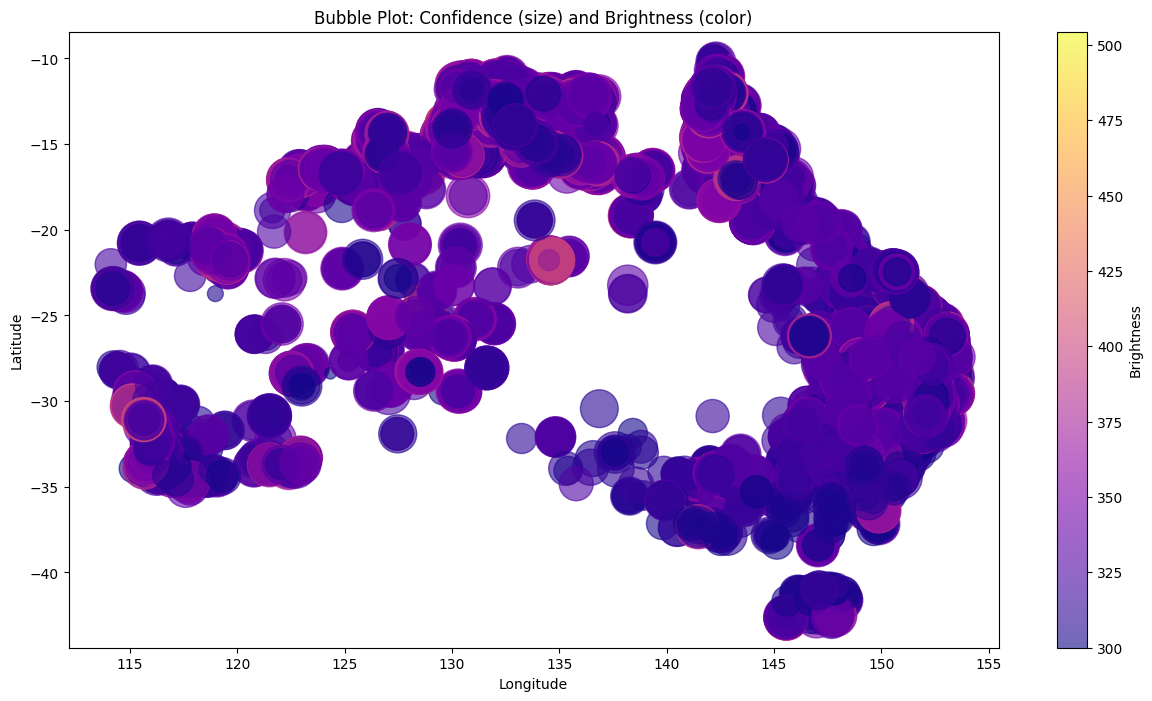

In [16]:
plt.figure(figsize=(15, 8))
plt.scatter(df['longitude'], df['latitude'], s=df['confidence']*10, c=df['brightness'], cmap='plasma', alpha=0.6)
plt.colorbar(label='Brightness')
plt.title('Bubble Plot: Confidence (size) and Brightness (color)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

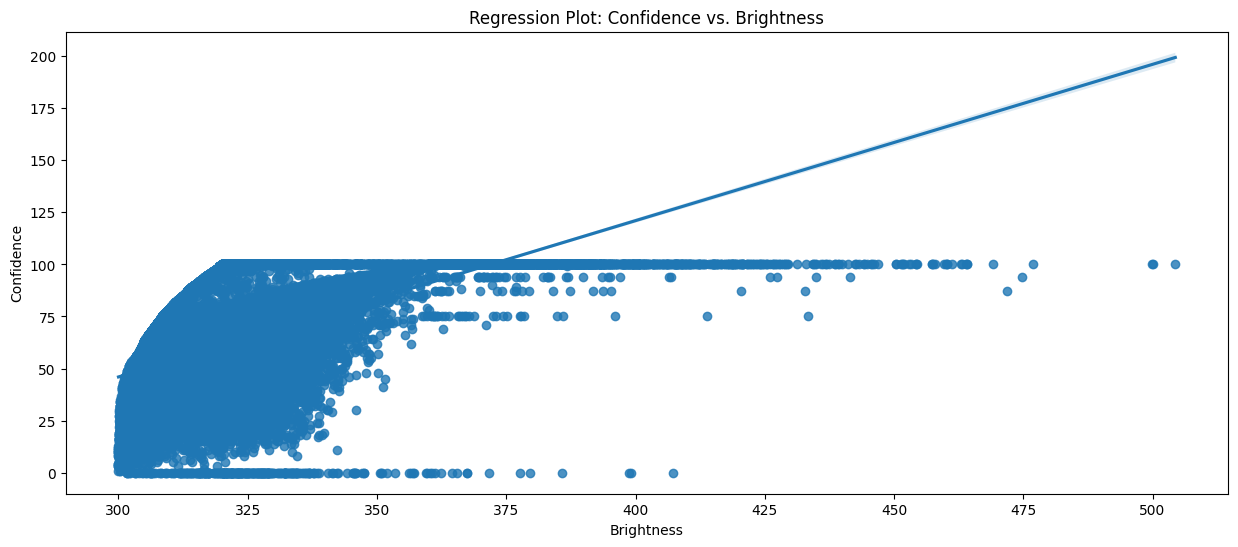

In [17]:
plt.figure(figsize=(15, 6))
sns.regplot(x=df['brightness'], y=df['confidence'])
plt.title('Regression Plot: Confidence vs. Brightness')
plt.xlabel('Brightness')
plt.ylabel('Confidence')
plt.show()

In [18]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          48      6.3       297.3   6.6        D     0  
1     Terra      MODIS          71      6.3       297.3  11.3        D     0  
2     Terra      MODIS          42      6.3       298.7  23.1        D     0  
3     Terra      MODIS          33      6.3       296.1   6.5        D     0  
4     Terra      MODIS          36      6.3       298.8  27.6        D     0

In [19]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score

features = ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time', 'bright_t31', 'frp']
X = df[features]
y = df['confidence']
baseline_model = CatBoostRegressor(random_seed=42, verbose=0)
baseline_model.fit(X, y)


In [20]:
y_pred_baseline = baseline_model.predict(X)
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
baseline_r2 = r2_score(y, y_pred_baseline)
print("Baseline CatBoost Model:")
print(f"RMSE: {baseline_rmse:.2f}")
print(f"R²: {baseline_r2:.2f}")

Baseline CatBoost Model:
RMSE: 11.66
R²: 0.75


In [21]:
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200],
    'l2_leaf_reg': [1, 3, 5]
}
model = CatBoostRegressor(random_seed=42, verbose=100)

cv = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=cv,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X, y)

0:	learn: 23.0808702	total: 56.6ms	remaining: 5.6s
0:	learn: 23.1296154	total: 58.7ms	remaining: 5.81s
0:	learn: 23.0164285	total: 63.2ms	remaining: 6.26s
0:	learn: 22.6769528	total: 67.8ms	remaining: 6.71s
99:	learn: 17.4476592	total: 1.29s	remaining: 0us
99:	learn: 17.4575518	total: 1.32s	remaining: 0us
0:	learn: 22.7149670	total: 21.2ms	remaining: 2.1s
99:	learn: 14.6072042	total: 1.32s	remaining: 0us
0:	learn: 22.6062251	total: 15.5ms	remaining: 1.53s
99:	learn: 17.3841313	total: 1.54s	remaining: 0us
0:	learn: 22.1858550	total: 12.5ms	remaining: 1.24s
0:	learn: 22.2105772	total: 30ms	remaining: 2.96s
99:	learn: 14.5161373	total: 983ms	remaining: 0us
0:	learn: 22.1073052	total: 15.2ms	remaining: 1.5s
99:	learn: 14.0554922	total: 896ms	remaining: 0us
99:	learn: 14.5166320	total: 1.42s	remaining: 0us
0:	learn: 23.0810185	total: 9ms	remaining: 891ms
0:	learn: 23.1297272	total: 31.9ms	remaining: 3.15s
99:	learn: 13.9746531	total: 1.14s	remaining: 0us
0:	learn: 23.0165230	total: 24.9ms	r

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x7b63ac23e290>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error')

In [22]:
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
print("\nGrid Search Results:")
print(f"Best Parameters: {best_params}")
print(f"Best RMSE (CV): {best_rmse:.2f}")



Grid Search Results:
Best Parameters: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best RMSE (CV): 13.37


In [23]:
best_model = CatBoostRegressor(**best_params, random_seed=42, verbose=0)
rmse_scores = []
r2_scores = []
for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train model
    best_model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
print("\nCross-Validation Results (Best Model):")
print(f"RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"R² Scores: {r2_scores}")
print(f"Mean R²: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")


Cross-Validation Results (Best Model):
RMSE Scores: [13.247714472899894, 13.444947241776418, 13.424481469849672]
Mean RMSE: 13.37 ± 0.09
R² Scores: [0.6731491441592196, 0.6603019667898364, 0.667961632850183]
Mean R²: 0.67 ± 0.01


In [24]:
best_model.fit(X, y)

# Predict and evaluate
y_pred_final = best_model.predict(X)
final_rmse = np.sqrt(mean_squared_error(y, y_pred_final))
final_r2 = r2_score(y, y_pred_final)
print("\nFinal Model (Trained on Full Data):")
print(f"RMSE: {final_rmse:.2f}")
print(f"R²: {final_r2:.2f}")


Final Model (Trained on Full Data):
RMSE: 12.35
R²: 0.72


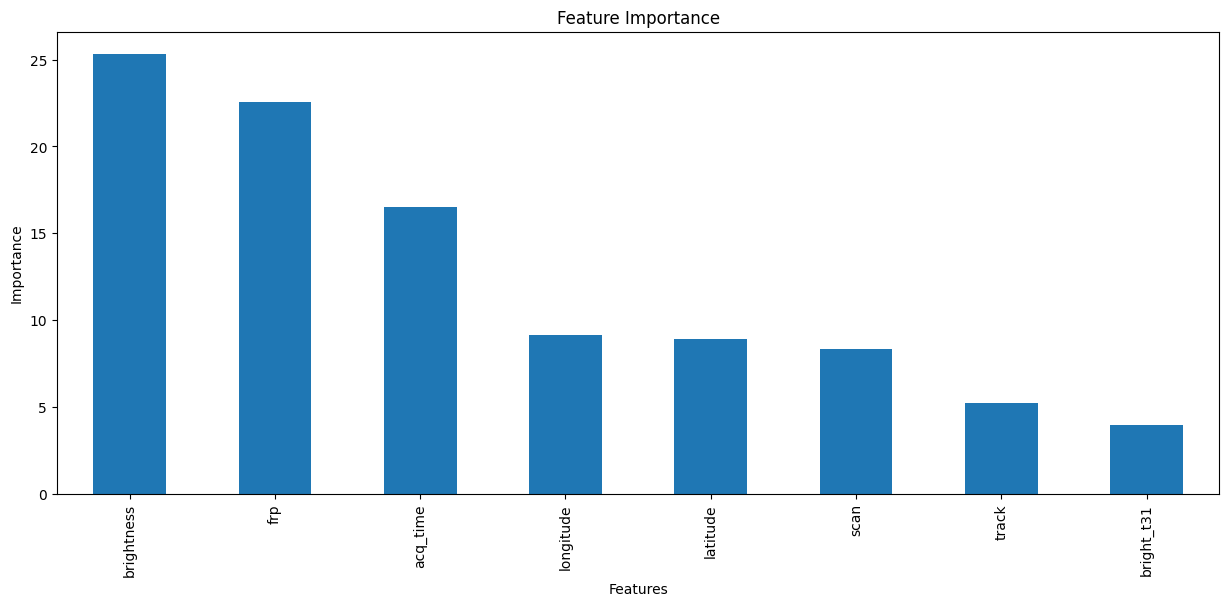

In [25]:
plt.figure(figsize=(15, 6))
feature_importance = pd.Series(best_model.feature_importances_, index=features)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

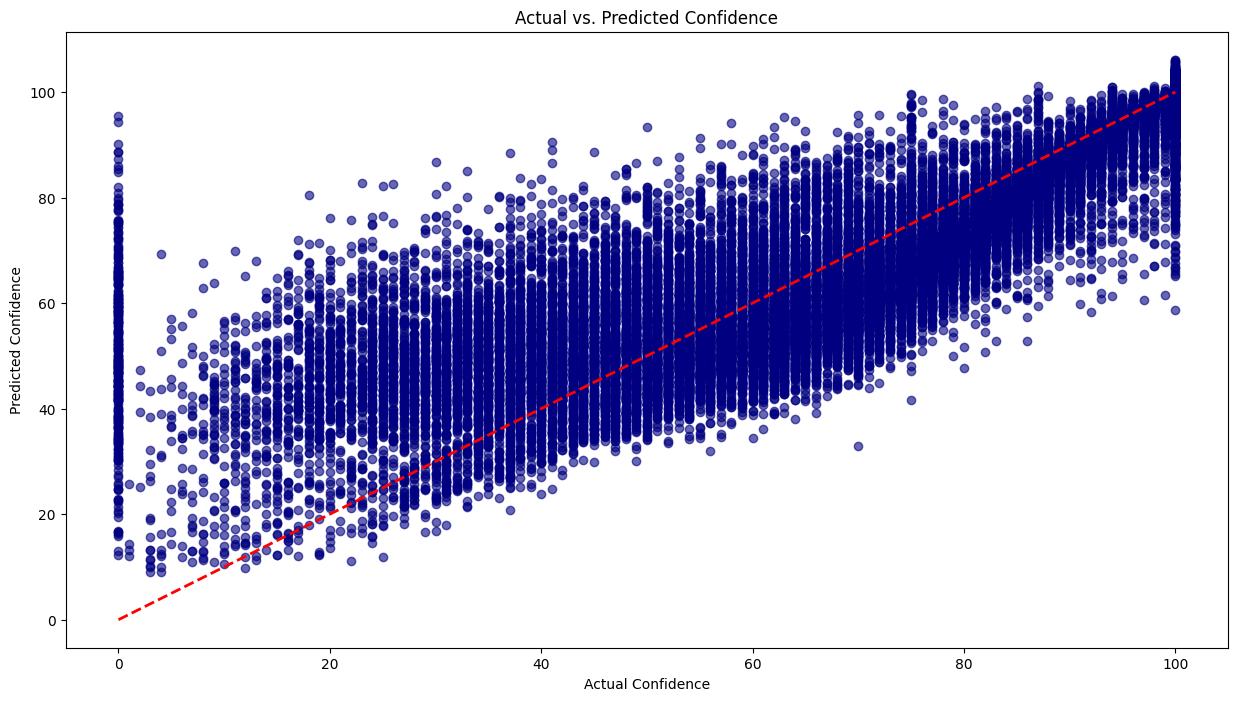

In [26]:
plt.figure(figsize=(15, 8))
plt.scatter(y, y_pred_final, alpha=0.6,color="navy")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Confidence')
plt.xlabel('Actual Confidence')
plt.ylabel('Predicted Confidence')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


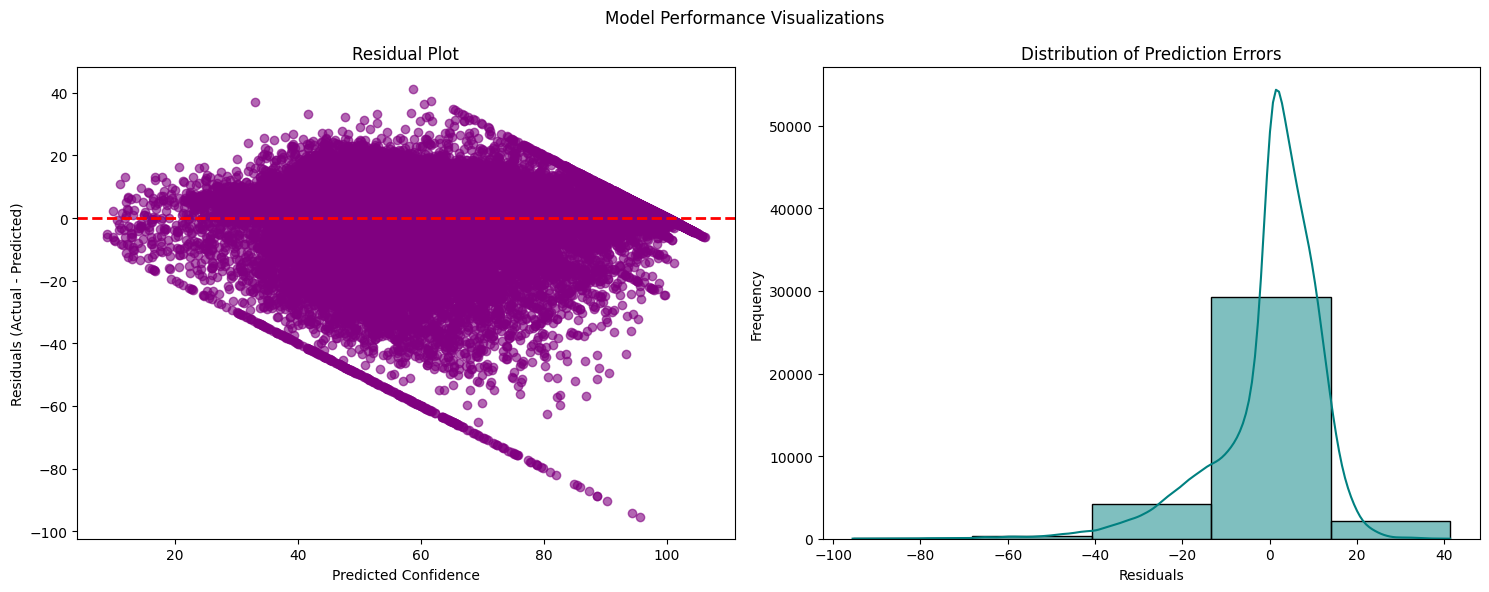

In [27]:
residuals = y - y_pred_final

# Subplots: Residual Plot, Prediction Error Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Model Performance Visualizations')

# Residual Plot
axes[0].scatter(y_pred_final, residuals, alpha=0.6, color="purple")
axes[0].axhline(0, color='red', linestyle='--', lw=2)
axes[0].set_title('Residual Plot')
axes[0].set_xlabel('Predicted Confidence')
axes[0].set_ylabel('Residuals (Actual - Predicted)')

# Prediction Error Distribution
sns.histplot(residuals, bins=5, kde=True, ax=axes[1], color="teal")
axes[1].set_title('Distribution of Prediction Errors')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


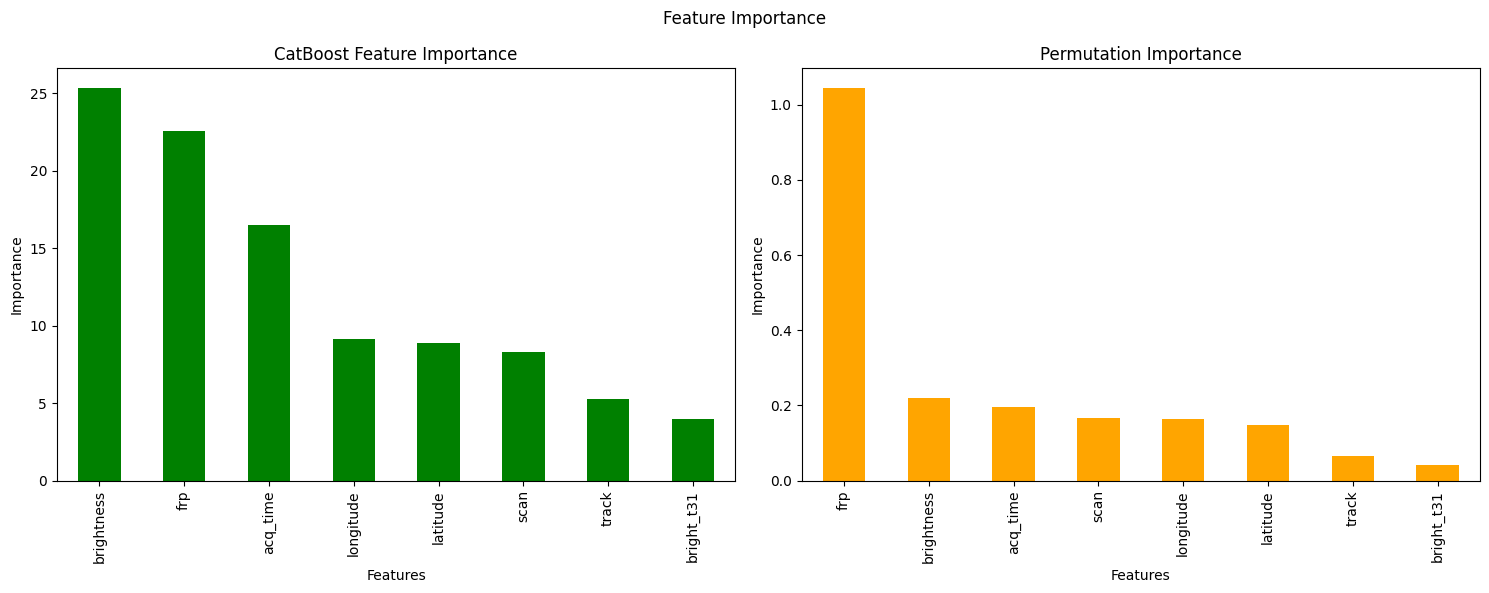

In [28]:
from sklearn.inspection import permutation_importance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Feature Importance')

# CatBoost Feature Importance
feature_importance = pd.Series(best_model.feature_importances_, index=features)
feature_importance.sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('CatBoost Feature Importance')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Importance')

# Permutation Importance
perm_importance = permutation_importance(best_model, X, y, n_repeats=10, random_state=42)
perm_importance_mean = pd.Series(perm_importance.importances_mean, index=features)
perm_importance_mean.sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Permutation Importance')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Importance')

plt.tight_layout()
plt.show()

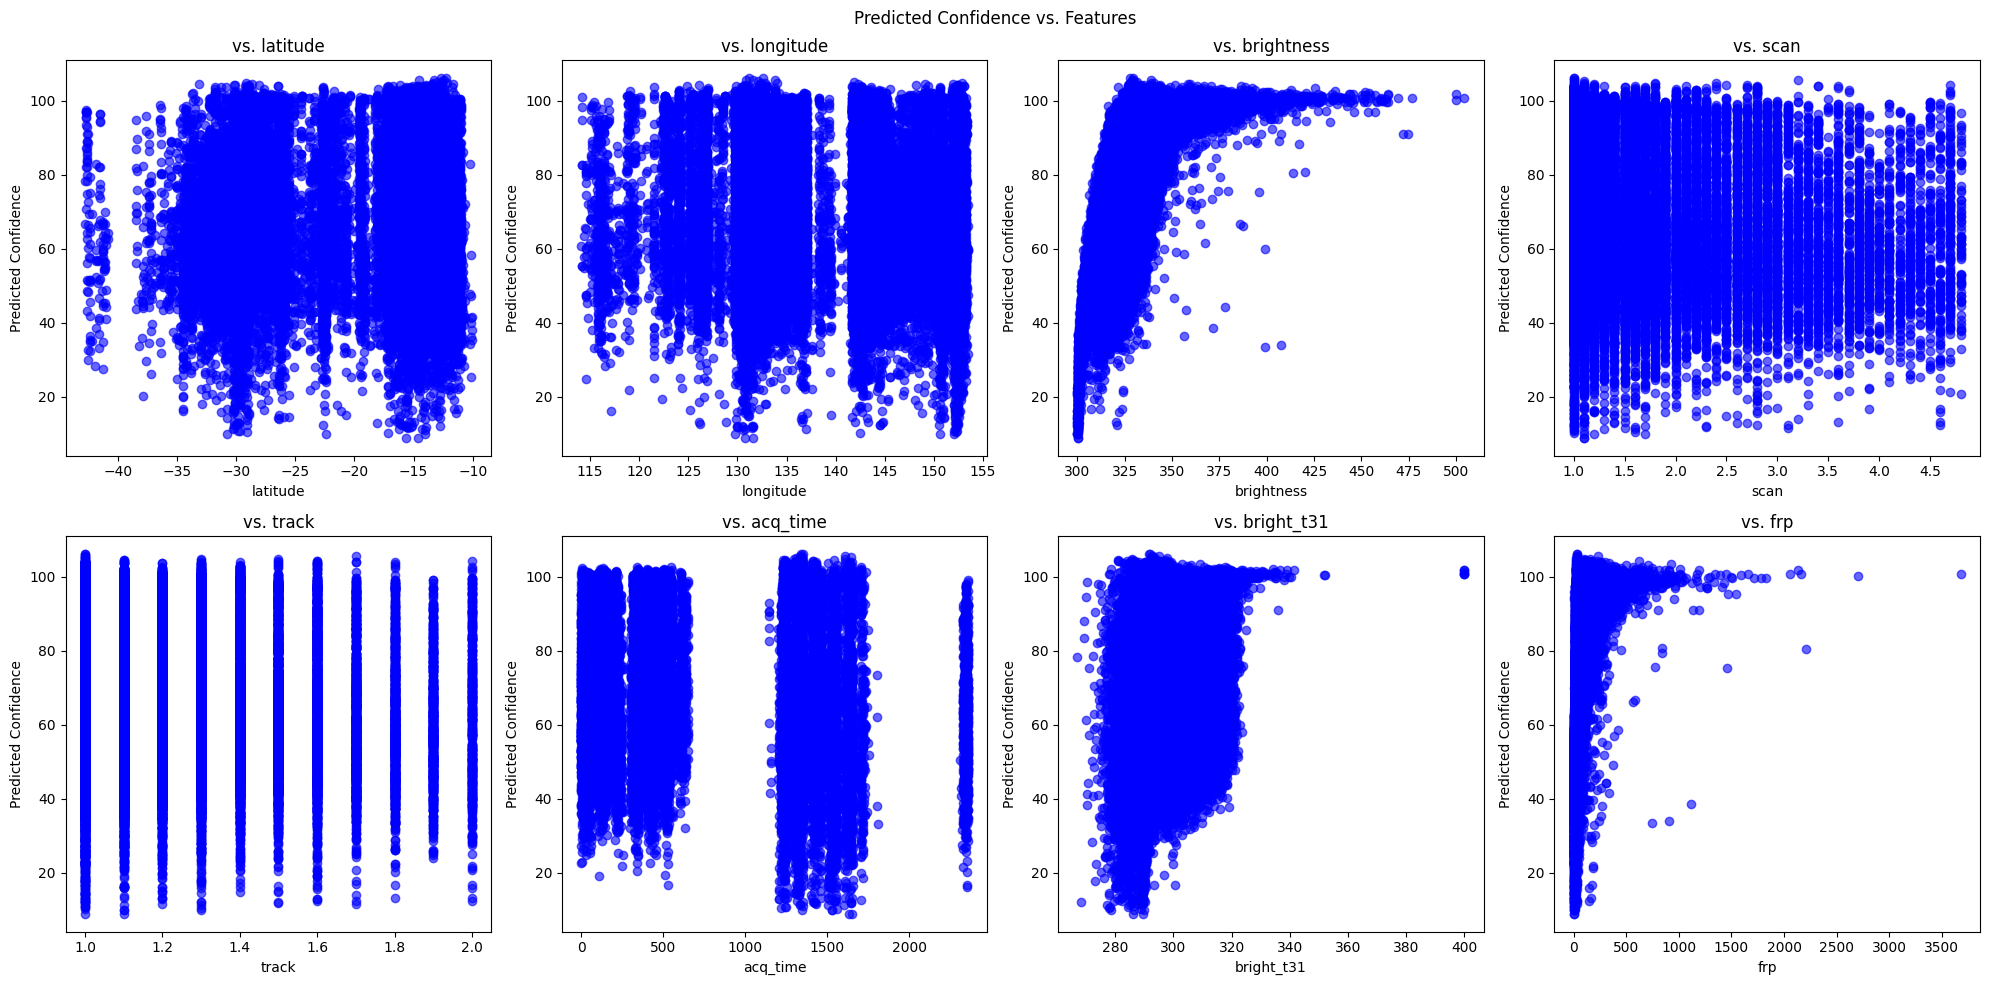

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Predicted Confidence vs. Features')
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], y_pred_final, alpha=0.6, color="blue")
    axes[i].set_title(f'vs. {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Predicted Confidence')

plt.tight_layout()
plt.show()


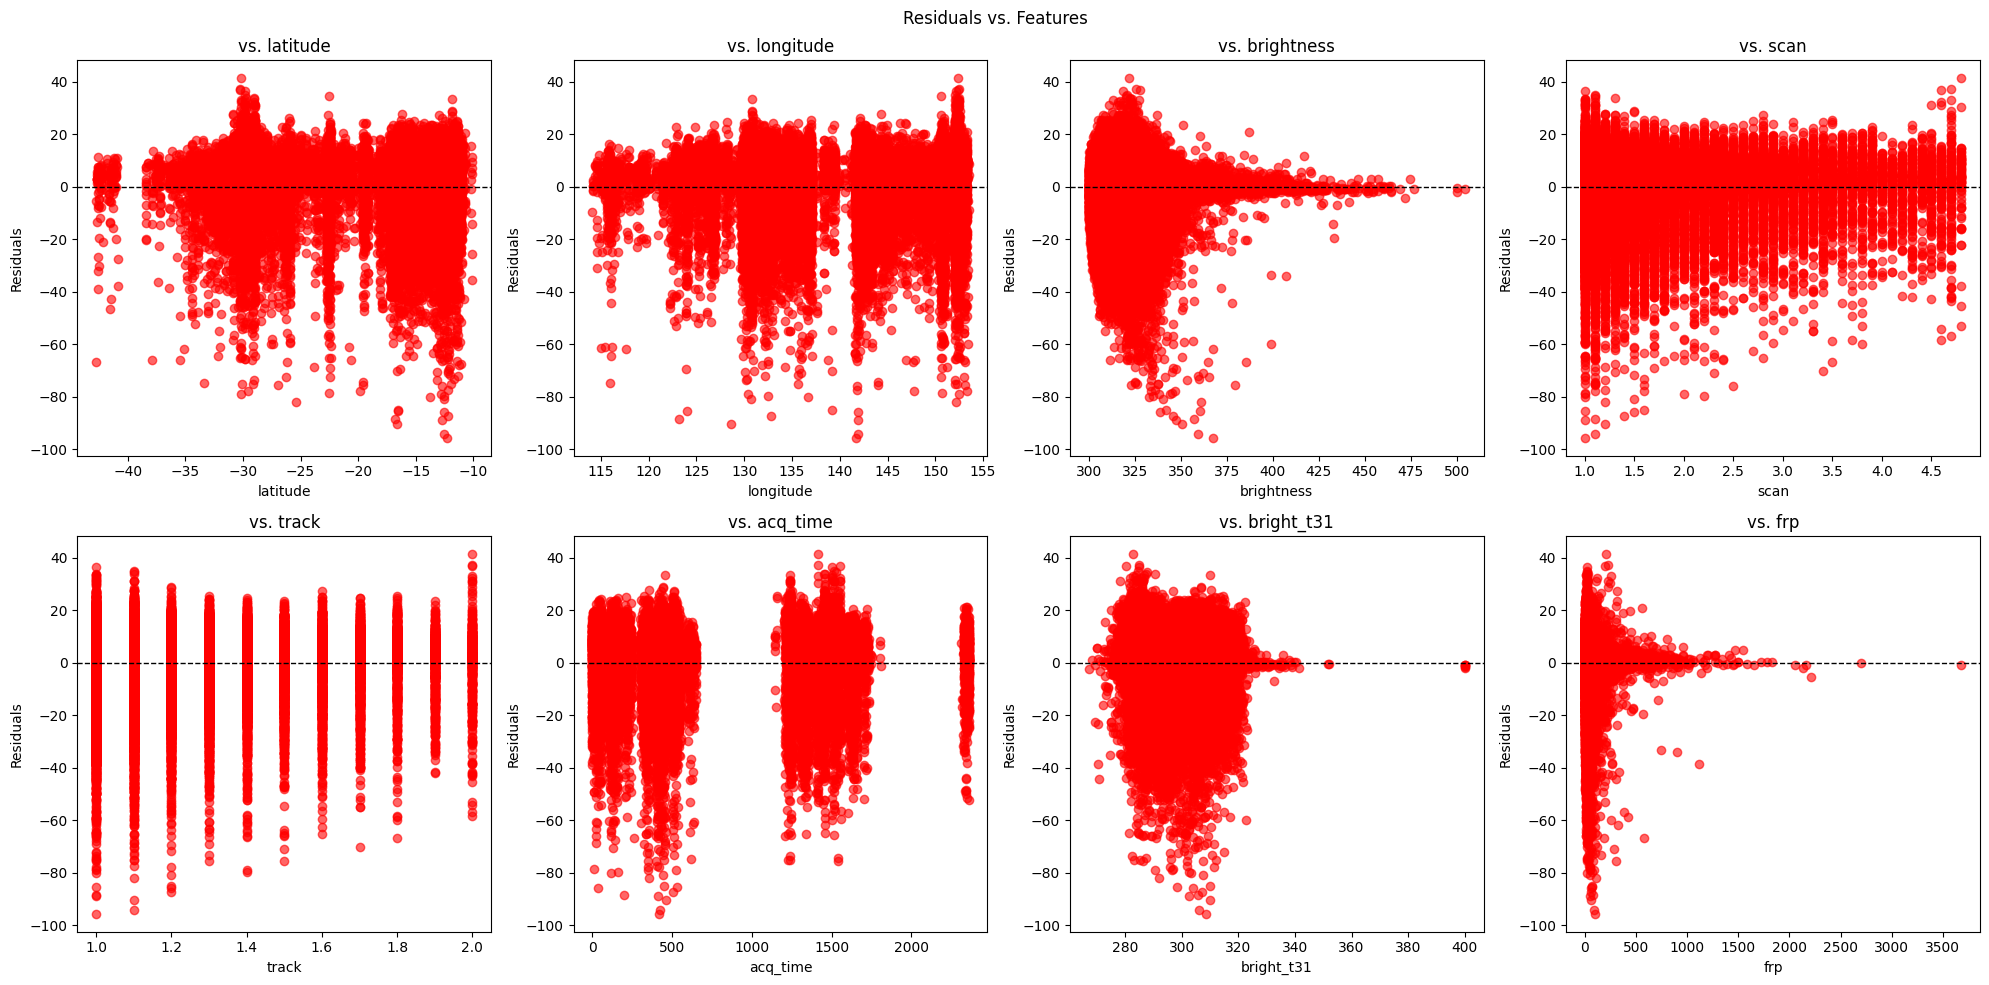

In [30]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Residuals vs. Features')
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], residuals, alpha=0.6, color="red")
    axes[i].axhline(0, color='black', linestyle='--', lw=1)
    axes[i].set_title(f'vs. {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

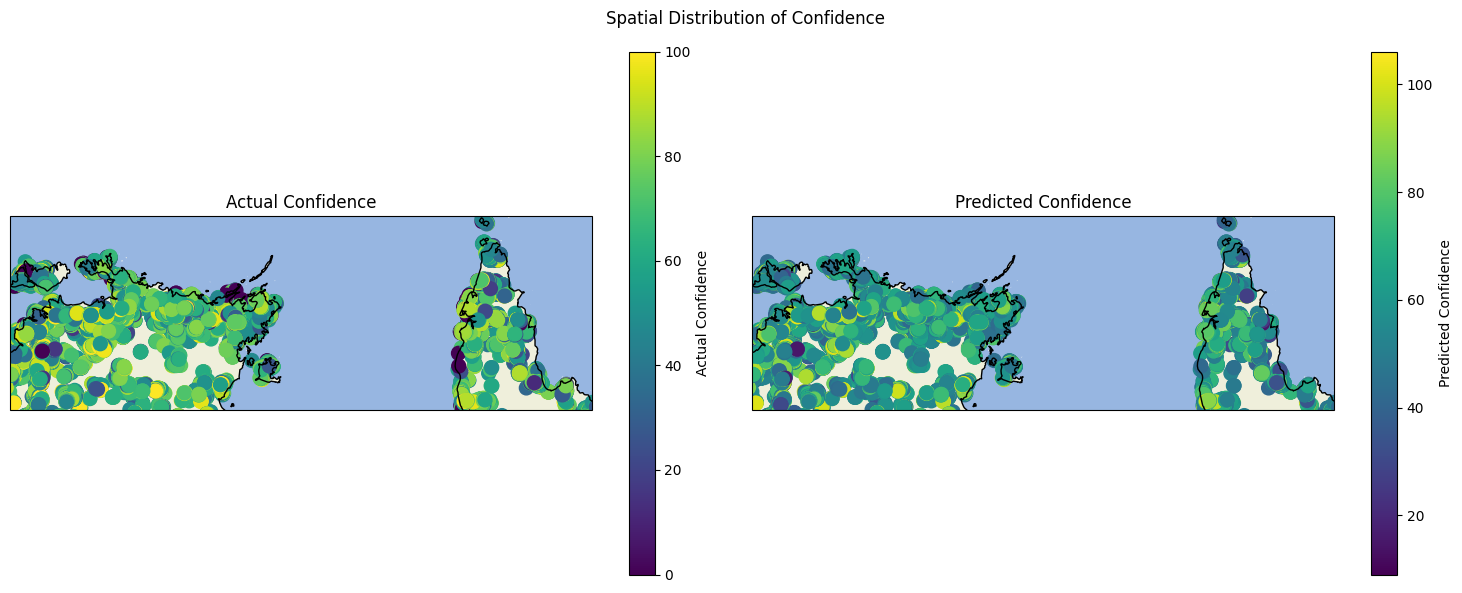

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Spatial Distribution of Confidence')

# Actual Confidence
axes[0].add_feature(cfeature.LAND)
axes[0].add_feature(cfeature.OCEAN)
axes[0].add_feature(cfeature.COASTLINE)
scatter_actual = axes[0].scatter(df['longitude'], df['latitude'], c=y, s=100, cmap='viridis', transform=ccrs.PlateCarree())
axes[0].set_title('Actual Confidence')
axes[0].set_extent([130, 145, -15, -10], crs=ccrs.PlateCarree())
fig.colorbar(scatter_actual, ax=axes[0], label='Actual Confidence')

# Predicted Confidence
axes[1].add_feature(cfeature.LAND)
axes[1].add_feature(cfeature.OCEAN)
axes[1].add_feature(cfeature.COASTLINE)
scatter_pred = axes[1].scatter(df['longitude'], df['latitude'], c=y_pred_final, s=100, cmap='viridis', transform=ccrs.PlateCarree())
axes[1].set_title('Predicted Confidence')
axes[1].set_extent([130, 145, -15, -10], crs=ccrs.PlateCarree())
fig.colorbar(scatter_pred, ax=axes[1], label='Predicted Confidence')

plt.tight_layout()
plt.show()